# PS2
## Dan Gamarnik

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import LeaveOneOut
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
import statsmodels.api as sm

### Q1: 
### Part A

In [8]:
# Load Data
bq_data = np.loadtxt('BQmat_orig.txt', delimiter=',')

age_vec = np.arange(18, 96)
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])
income_matrix, age_matrix = np.meshgrid(prcntl_mdpts, age_vec)

<IPython.core.display.Javascript object>


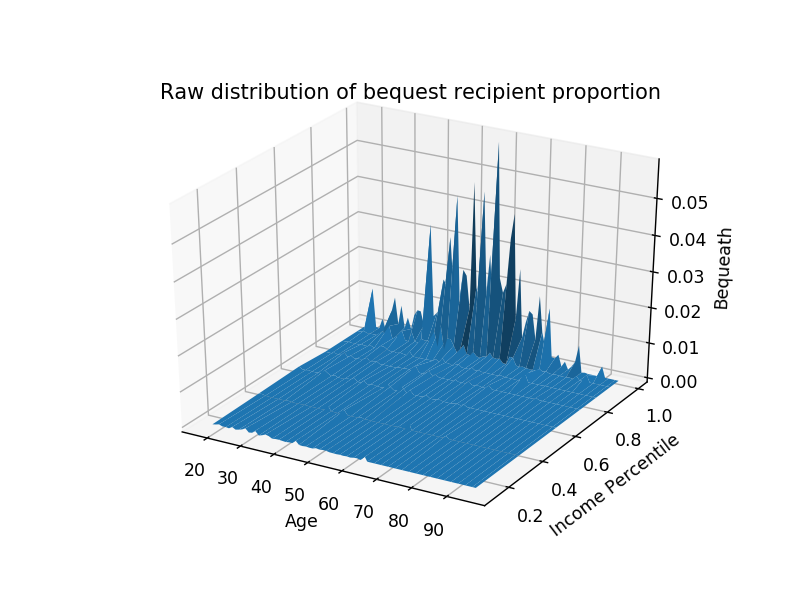

Text(0.5,0,'Income Percentile')

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_matrix, income_matrix, bq_data)

ax.set_title('Raw distribution of bequest recipient proportion')
ax.set_zlabel('Bequeath')
ax.set_xlabel('Age')
ax.set_ylabel('Income Percentile')

### Q1: 
### Part B

In [10]:
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut(len(bq_data)))
grid.fit(bq_data);

In [11]:
grid.best_params_

print("The best badndwitdth is:", grid.best_params_)

The best badndwitdth is: {'bandwidth': 0.1}


<IPython.core.display.Javascript object>


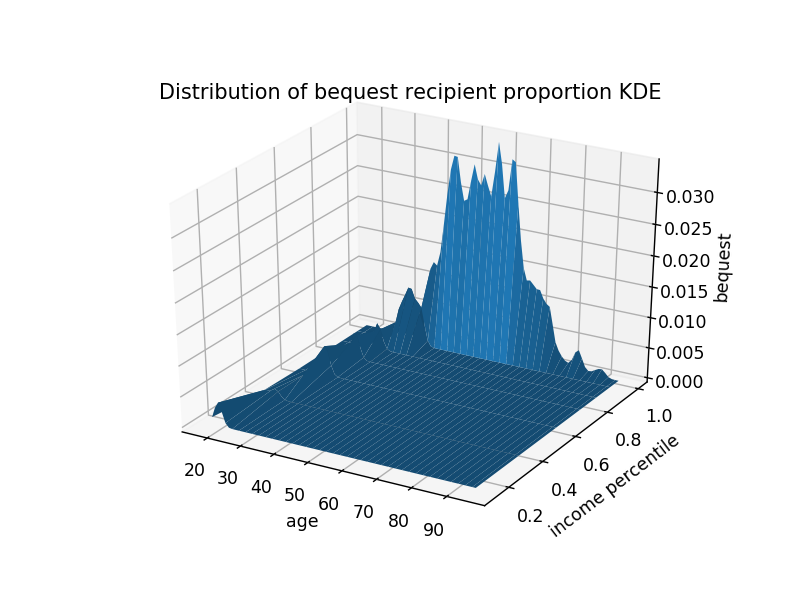

In [12]:
bandwidth=0.1
abils_midpt = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])
prop_mat_inc = np.sum(bq_data, axis=0)
prop_mat_age = np.sum(bq_data, axis=1)
lrg_samp = 70000
age_probs = np.random.multinomial(lrg_samp, prop_mat_age)
income_probs = np.random.multinomial(lrg_samp, prop_mat_inc)
age_freq = np.array([])
inc_freq = np.array([])

# creating a distribution of age values
for age, num_s in zip(age_vec, age_probs):
    vec_age_s = np.ones(num_s)
    vec_age_s *= age
    age_freq = np.append(age_freq, vec_age_s)

# creating a distribution of ability type values
for abil, num_j in zip(lambdas_mdpts, income_probs):
    vec_abil_j = np.ones(num_j)
    vec_abil_j *= abil
    inc_freq = np.append(inc_freq, vec_abil_j)

data = np.vstack((age_freq, inc_freq))
density = gaussian_kde(data, bw_method=bandwidth)

ages_mat, abils_mat=np.meshgrid(age_vec,lambdas_mdpts)

coords = np.vstack([item.ravel() for item in [ages_mat, abils_mat]])
BQkde = density(coords).reshape(ages_mat.shape)
BQkde_scaled = BQkde / BQkde.sum()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('age')
ax.set_ylabel('income percentile')
ax.set_zlabel('bequest')
ax.set_title('Distribution of bequest recipient proportion KDE')
ax.plot_surface(ages_mat,abils_mat , BQkde_scaled)

In [13]:
BQkde_scaled[5,44]

6.258275692686864e-07

### Q2: 
### Part A

In [14]:
biden = pd.read_csv('biden.csv', usecols=['biden', 'age', 'educ'])
biden.dropna(inplace=True)

In [15]:
y = biden['biden'] # define y variable
biden['age_educ'] = biden['age'] * biden['educ'] 
biden['constant'] = 1
X = biden[['educ', 'age_educ','constant','age']] 

In [16]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  biden   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     10.13
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           1.29e-06
Time:                        02:01:08   Log-Likelihood:                -8333.3
No. Observations:                1826   AIC:                         1.667e+04
Df Residuals:                    1822   BIC:                         1.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
educ           1.7123      0.709      2.414      0.016       0.321       3.103
age_educ      -0.0477      0.013     -3.728      0.000      -0.073      -0.023
constant      37.5491      9.491      3.956      0.000      18.935      56.163
age            0.6674      0.169      3.950      0.000       0.336       0.999
==============================================================================
Omnibus:                       64.792   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.979
Skew:                          -0.480   Prob(JB):                     3.86e-16
Kurtosis:                       3.105   Cond. No.                     1.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The marginal effect of age is $\beta_1+\beta_3 X_2$, and the estimated effect is $0.67-0.048\times education$, with all coefficients significant at 0.01 or higher. In other words, as educated people get older, their feelings for Biden decrease.  

<IPython.core.display.Javascript object>


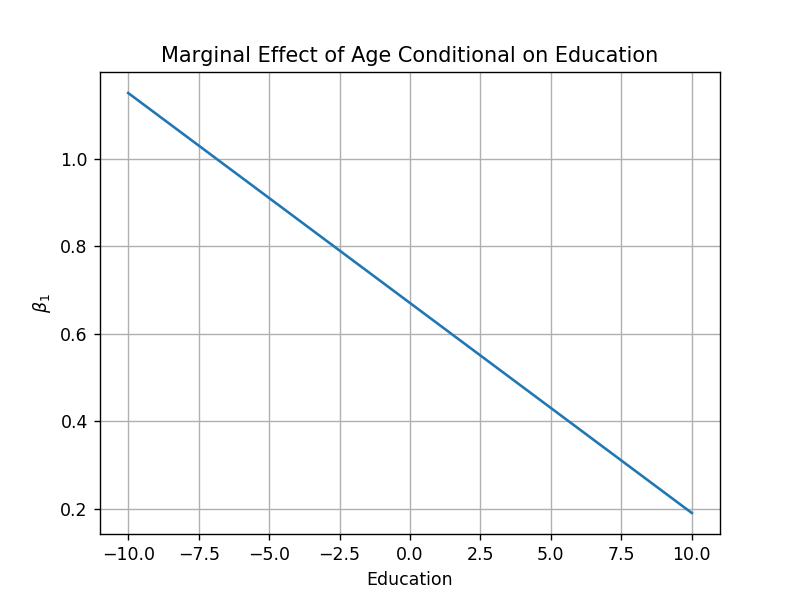

In [17]:
x = np.linspace(-10, 10, 1000)    
fig, ax = plt.subplots()
ax.plot(x, (0.67-0.048*x))
ax.grid(True, which='both')
ax.set_ylabel(r"$\beta_1$")
ax.set_xlabel("Education")
ax.set_title("Marginal Effect of Age Conditional on Education")
plt.show()

### Q2: 
### Part B

The marginal effect of education is $\beta_2+\beta_3 X_1$, and the estimated effect is $1.71-0.048\times age$, with all coefficients significant at 0.05. In other words, as older get more educated, their feelings for Biden also decrease.  

<IPython.core.display.Javascript object>


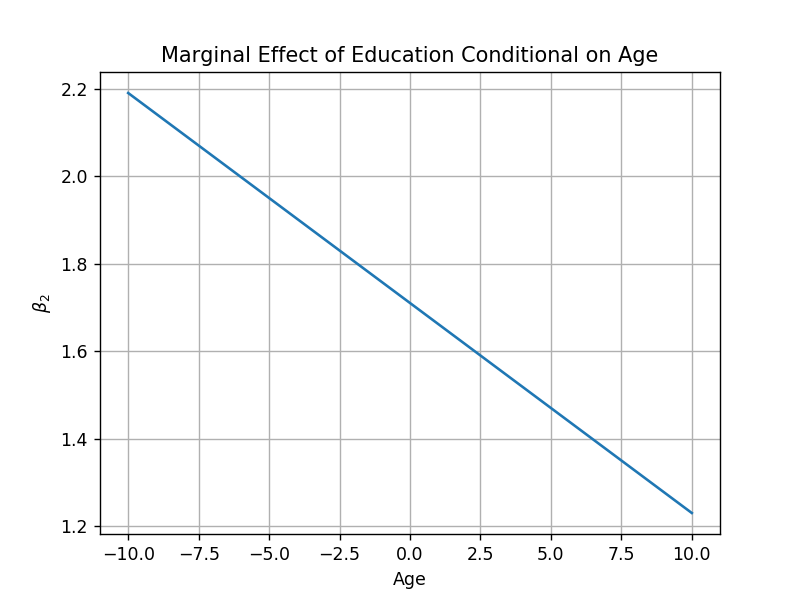

In [18]:
fig, ax = plt.subplots()
ax.plot(x, (1.71-0.048*x))
ax.grid(True, which='both')
ax.set_ylabel(r"$\beta_2$")
ax.set_xlabel("Age")
ax.set_title("Marginal Effect of Education Conditional on Age")
plt.show()